In [1]:
from scipy import io
from pathlib import Path

import numpy as np
rng = np.random.default_rng()

import jax.numpy as jnp
import jax.random as jr

import optax

from collections import defaultdict
import pickle as pkl

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from dynamax.hidden_markov_model import ET_HMM, E_HMM, T_HMM
from dynamax.utils.plotting import gradient_cmap

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
# A training cache to store all the models and their parameters
training_cache = defaultdict(dict)

# DS to store the models organized
class Model_Store:
    n_states: int
    fit_model: None
    fit_params: None
    lps: None

In [3]:
loaded_cache = pkl.load(open('../analysis/cache/training_cache_2.pkl', 'rb'))

In [4]:
loaded_cache["ET_HMM"][2].lps

Array([1.9862871, 1.9824057, 1.9785368, ..., 1.1267238, 1.1267238,
       1.1267236], dtype=float32)

Text(0, 0.5, 'Loss')

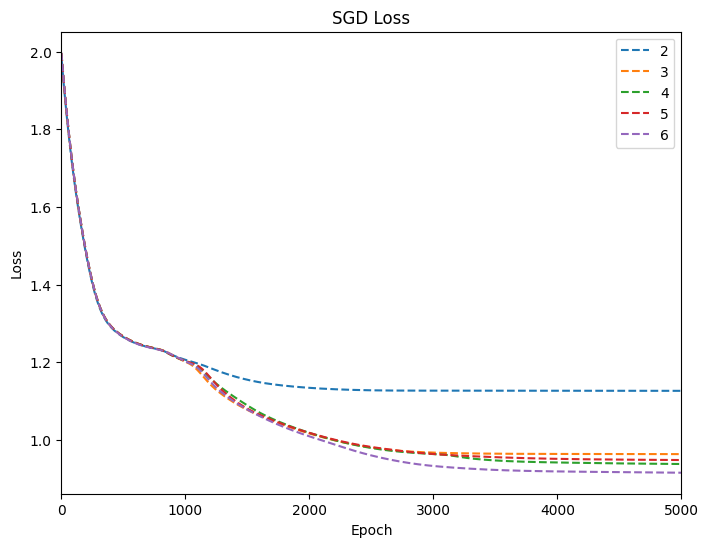

In [5]:
# SGD
plt.figure(figsize=(8, 6))

for x in range(2,7):
    plt.plot(loaded_cache["ET_HMM"][x].lps, "--")
plt.legend(range(2, 7))
# plt.ylim(-2, 2)
plt.xlim(0, 5000)
plt.title("SGD Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.savefig("sgd_loss.eps", format="eps")

Text(0, 0.5, 'Loss')

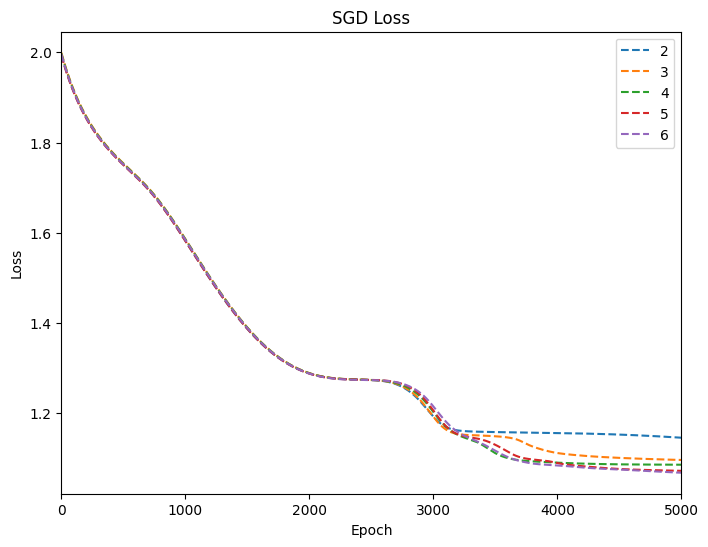

In [6]:
# SGD
plt.figure(figsize=(8, 6))

for x in range(2,7):
    plt.plot(loaded_cache["T_HMM"][x].lps, "--")
plt.legend(range(2, 7))
# plt.ylim(-2, 2)
plt.xlim(0, 5000)
plt.title("SGD Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

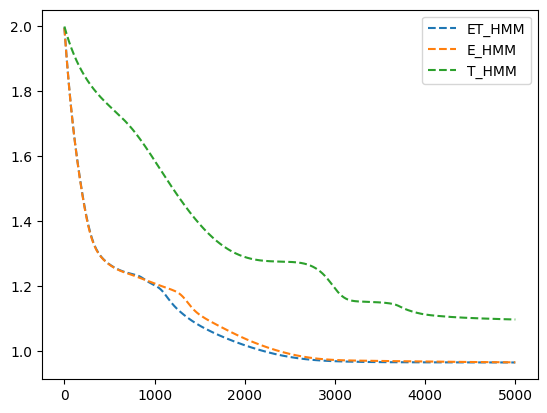

In [7]:
state = 3
plt.plot(loaded_cache["ET_HMM"][state].lps, "--")
plt.plot(loaded_cache["E_HMM"][state].lps, "--")
plt.plot(loaded_cache["T_HMM"][state].lps, "--")
plt.legend(["ET_HMM", "E_HMM", "T_HMM"])

In [8]:
loaded_cache["ET_HMM"][2].fit_params.emissions.weights

Array([[[ 0.216029  ,  0.02790617,  0.01633381,  0.03509545,
          1.3987256 ]],

       [[ 0.06578622, -0.02190064,  0.04457312,  0.00982139,
          0.39937398]]], dtype=float32)

In [9]:
import pandas as pd
#   - 1st column: Stimulus (calibrated)
#   - 2nd column: Coherence
#   - 3rd column: Attention
#   - 4th column: Expectation (calibrated)

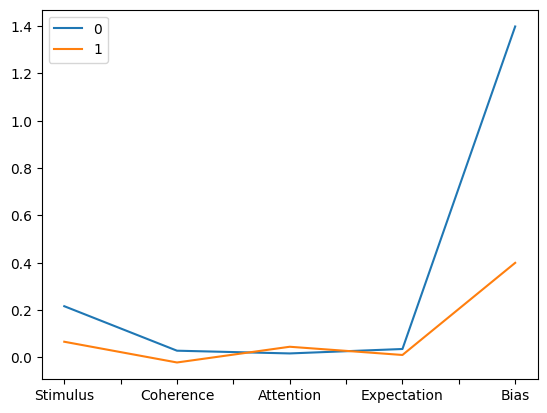

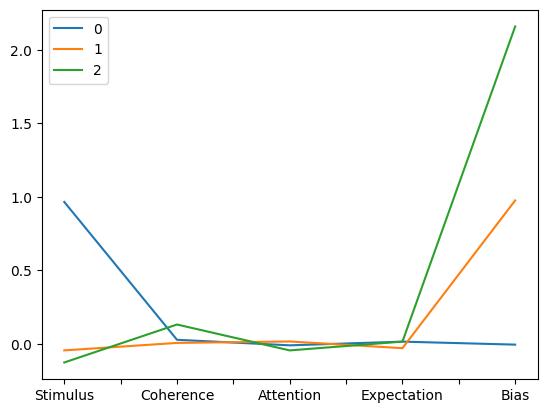

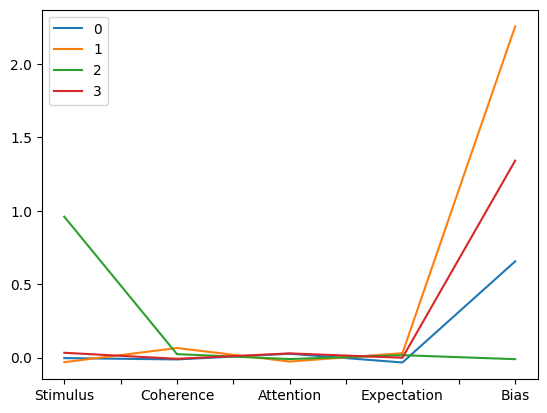

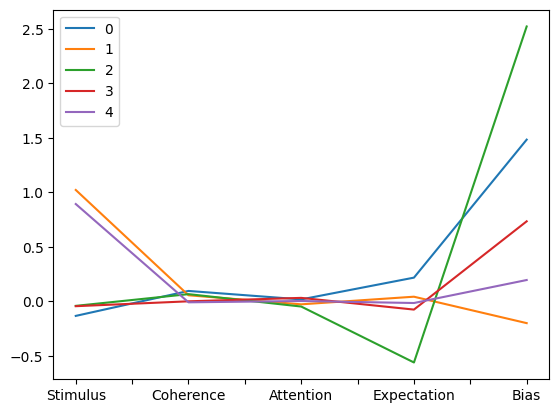

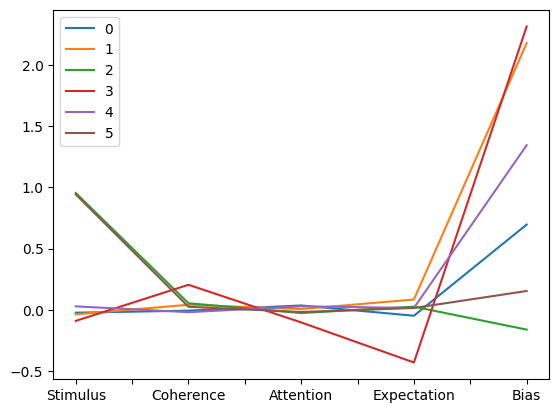

In [10]:
for x in range(2,7):
    pd.DataFrame(loaded_cache["ET_HMM"][x].fit_params.emissions.weights[:,0,:], 
                 columns=["Stimulus", "Coherence", "Attention", "Expectation", "Bias"]).T.plot.line()

In [11]:
tm_et = loaded_cache["ET_HMM"][4].fit_params.transitions.transition_matrix
tw_et = loaded_cache["ET_HMM"][4].fit_params.transitions.transition_weights

In [12]:
tm_et

Array([[0.04887042, 0.54281855, 0.17207065, 0.2362404 ],
       [0.65280056, 0.26116323, 0.06902494, 0.01701125],
       [0.03294595, 0.0073196 , 0.8997518 , 0.05998273],
       [0.21167773, 0.09574901, 0.45004818, 0.24252509]], dtype=float32)

In [13]:
tw_et

Array([[-0.00474295, -0.00181616,  0.00908132,  0.01618188,  0.00361727],
       [-0.00874161, -0.02615204,  0.0173904 ,  0.01240448,  0.00147704],
       [ 0.00109061, -0.00367851, -0.00543716, -0.00289312, -0.00458931],
       [ 0.01859531,  0.00372585,  0.00073685, -0.00293741,  0.00642159]],      dtype=float32)

In [14]:
tm = loaded_cache["E_HMM"][4].fit_params.transitions.transition_matrix
tm

Array([[0.33699033, 0.04537826, 0.13770638, 0.47992495],
       [0.01595717, 0.7239779 , 0.23289703, 0.02716786],
       [0.05090712, 0.3581827 , 0.45742762, 0.1334826 ],
       [0.4901828 , 0.09821837, 0.1699269 , 0.2416719 ]], dtype=float32)

In [15]:
tw_et_pd = pd.DataFrame(tw_et, columns=["Stimulus", "Coherence", "Attention", "Expectation", "Bias"])

<Axes: >

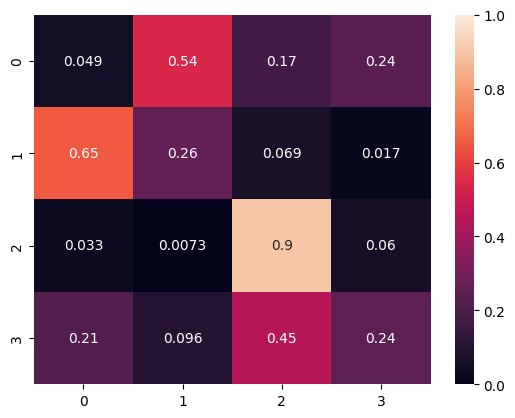

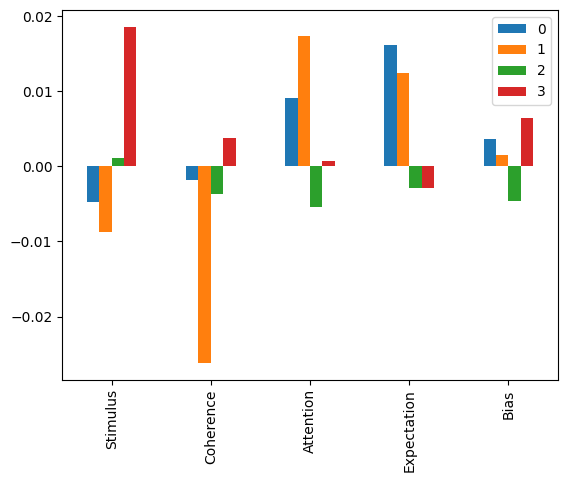

In [16]:
sns.heatmap(tm_et, annot=True, vmax=1, vmin=0)

tw_et_pd.T.plot.bar()

<Axes: >

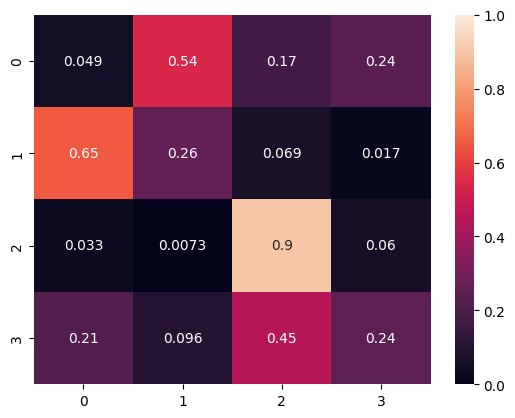

In [17]:
sns.heatmap(tm_et, annot=True, vmax=1, vmin=0)